In [1]:
# !pip install --upgrade pandas-datareader
# !pip install yfinance
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import pandas_datareader as data
import datetime
import warnings
warnings.filterwarnings('ignore')

In [2]:
 df = yf.download("ADANIENT.NS", start="2020-01-01", end="2023-02-12")
 df=df.round(2)

[*********************100%***********************]  1 of 1 completed


In [3]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-01,209.00,210.45,206.65,207.85,206.12,1553127
2020-01-02,208.00,213.20,207.50,211.20,209.44,2991937
2020-01-03,210.25,212.35,205.80,208.30,206.56,2512421
2020-01-06,207.75,207.75,197.75,199.55,197.89,4353179
2020-01-07,200.55,205.70,200.55,204.05,202.35,2966120


In [4]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-02-06,1575.00,1615.00,1435.20,1572.70,1572.70,19308603
2023-02-07,1571.00,1962.70,1525.60,1802.95,1802.95,19188072
2023-02-08,1869.85,2222.15,1840.85,2164.25,2164.25,19173006
2023-02-09,2168.00,2168.00,1731.40,1925.70,1925.70,18279862
2023-02-10,1769.00,1990.00,1733.15,1846.95,1846.95,11334878


In [5]:
df.shape

(776, 6)

In [6]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [7]:
df.duplicated().sum()

0

In [8]:
df.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [9]:
df.dropna(inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 776 entries, 2020-01-01 to 2023-02-10
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       776 non-null    float64
 1   High       776 non-null    float64
 2   Low        776 non-null    float64
 3   Close      776 non-null    float64
 4   Adj Close  776 non-null    float64
 5   Volume     776 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 42.4 KB


In [11]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,776.000000,776.000000,776.000000,776.000000,776.000000,7.760000e+02
mean,1457.520941,1484.426740,1427.072358,1456.515851,1455.890941,4.753229e+06
std,1157.218274,1172.336313,1135.864261,1154.038099,1154.213288,5.389994e+06
min,121.000000,129.800000,116.400000,120.900000,120.770000,2.482490e+05
25%,312.587500,319.112500,307.012500,312.750000,312.410000,1.714098e+06
50%,1443.925000,1474.375000,1415.175000,1442.225000,1441.615000,3.077650e+06
75%,2136.037500,2176.250000,2076.287500,2111.450000,2110.550000,5.361654e+06
max,4175.000000,4190.000000,4066.400000,4165.300000,4165.300000,4.926454e+07


In [12]:
df.nunique()
df['Date'] = df.index

In [13]:
df

,Open,High,Low,Close,Adj Close,Volume,Date
Date,,,,,,,
2020-01-01,209.00,210.45,206.65,207.85,206.12,1553127,2020-01-01
2020-01-02,208.00,213.20,207.50,211.20,209.44,2991937,2020-01-02
2020-01-03,210.25,212.35,205.80,208.30,206.56,2512421,2020-01-03
2020-01-06,207.75,207.75,197.75,199.55,197.89,4353179,2020-01-06
2020-01-07,200.55,205.70,200.55,204.05,202.35,2966120,2020-01-07
...,...,...,...,...,...,...,...
2023-02-06,1575.00,1615.00,1435.20,1572.70,1572.70,19308603,2023-02-06
2023-02-07,1571.00,1962.70,1525.60,1802.95,1802.95,19188072,2023-02-07
2023-02-08,1869.85,2222.15,1840.85,2164.25,2164.25,19173006,2023-02-08


In [14]:
print("Starting date: ",df.iloc[0][-1])
print("Ending date: ", df.iloc[-1][-1])
print("Duration: ", df.iloc[-1][-1]-df.iloc[0][-1])

Starting date:  2020-01-01 00:00:00
Ending date:  2023-02-10 00:00:00
Duration:  1136 days 00:00:00


In [15]:
monthvise= df.groupby(df['Date'].dt.strftime('%B'))[['Open','Close']].mean().sort_values(by='Close')

In [16]:
monthvise

,Open,Close
Date,,
March,951.176190,955.553175
February,1023.341791,1009.479104
April,1184.605357,1189.132143
May,1235.105000,1230.002500
June,1284.721212,1285.371212
July,1289.846154,1291.502308
January,1501.656548,1490.852976
August,1508.315323,1519.850000
October,1667.537500,1660.111667


In [17]:
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

In [18]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Open'],
    name='Stock Open Price',
    marker_color='#BE3525'
))
fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Close'],
    name='Stock Close Price',
    marker_color='#25BE4B'
))
fig.update_layout(barmode='group', title='Monthwise comparision between Stock open and close price', title_x=0.5, width=1200, height=400)
fig.show()

In [19]:
df.groupby(df['Date'].dt.strftime('%B'))['Low'].min()

Date
April        128.00
August       171.20
December     395.10
February     215.60
January      194.55
July         145.20
June         141.00
March        116.40
May          127.30
November     333.05
October      296.00
September    257.50
Name: Low, dtype: float64

In [20]:
df.groupby(df['Date'].dt.strftime('%B'))['Low'].max()

Date
April        2336.30
August       3161.00
December     4066.40
February     1941.20
January      3822.55
July         2560.00
June         2207.05
March        1991.00
May          2311.00
November     4022.00
October      3326.10
September    3812.00
Name: Low, dtype: float64

In [21]:
df.groupby(df['Date'].dt.strftime('%B'))['High'].min()

Date
April        134.60
August       178.70
December     423.95
February     224.65
January      203.55
July         150.00
June         148.45
March        129.80
May          135.40
November     344.30
October      311.95
September    281.25
Name: High, dtype: float64

In [22]:
df.groupby(df['Date'].dt.strftime('%B'))['High'].max()

Date
April        2420.95
August       3263.10
December     4190.00
February     3010.75
January      3880.00
July         2622.00
June         2274.00
March        2042.00
May          2362.90
November     4096.00
October      3460.05
September    3885.00
Name: High, dtype: float64

In [23]:
monthvise_high= df.groupby(df['Date'].dt.strftime('%B'))['High'].max()
monthvise_low= df.groupby(df['Date'].dt.strftime('%B'))['Low'].min()

In [24]:
fig = go.Figure()
fig.add_trace(go.Bar(
    x=monthvise_high.index,
    y=monthvise_high,
    name='Stock high Price',
    marker_color='#BE3525'
))
fig.add_trace(go.Bar(
    x=monthvise_low.index,
    y=monthvise_low,
    name='Stock low Price',
    marker_color='#25BE4B'
))

fig.update_layout(barmode='group', title=' Monthwise High and Low stock price', title_x=0.5,width=1200, height=400)
fig.show()

In [25]:
fig = px.line(df, x=df.Date, y=[df['Open'], df['Close'],df['High'], df['Low']], labels={'date': 'Date','value':'Stock value'},width=1200, height=400)
fig.update_layout(title_text='Stock analysis chart', font_size=10, font_color='Black',legend_title_text='Stock Parameters', title_x=0.5)
fig.show()

In [26]:
closedf = df[['Date','Close']]
print("Shape of close dataframe:", closedf.shape)

Shape of close dataframe: (776, 2)


In [27]:
fig = px.line(closedf, x=closedf.Date, y=closedf.Close,labels={'Date':'Date','Close':'Close Stock'})
fig.update_layout(title_text='Stock close price chart', font_size=10, font_color='black', title_x = 0.5, width=1200, height=400)
fig.show()

#### **Evaluation Metrics**
**mean_squared_error:**
* This is a metric that measures the average squared difference between the predicted and actual values. It is calculated as the mean of the squared differences between the predicted and actual values. This metric is useful for penalizing large errors in the predictions, and is commonly used as a loss function during training. However, it can be sensitive to outliers and does not provide an easily interpretable measure of error in the original units of the response variable.

**mean_absolute_error:** 
* This is a metric that measures the average absolute difference between the predicted and actual values. It is calculated as the mean of the absolute differences between the predicted and actual values. This metric provides an easily interpretable measure of error in the original units of the response variable, and is less sensitive to outliers than the mean squared error.

**explained_variance_score:** 
* This is a metric that measures the proportion of variance in the target variable that is explained by the model. It is calculated as 1 - (variance of residuals / variance of target variable). This metric provides an indication of how well the model fits the data and can be interpreted as the amount of information captured by the model.

**r2_score:**
* This is a metric that measures the proportion of variance in the target variable that is explained by the model, normalized by the total variance in the target variable. It is calculated as 1 - (sum of squared residuals / total sum of squares). This metric provides a normalized indication of how well the model fits the data, and can be interpreted as the percentage of variance in the target variable that is explained by the model. It ranges from 0 to 1, with 1 indicating a perfect fit and values close to 0 indicating poor performance.

**mean_poisson_deviance:**
* It is a metric that measures the goodness of fit of a Poisson regression model. It compares the predicted values of the model with the observed values and calculates the mean deviation of the predicted values from the observed values. A lower value of this metric indicates a better fit of the model to the data.

**mean_gamma_deviance:**
* It is a metric that measures the goodness of fit of a Gamma regression model. It compares the predicted values of the model with the observed values and calculates the mean deviation of the predicted values from the observed values. A lower value of this metric indicates a better fit of the model to the data.

**accuracy_score:**
* It is a metric used to evaluate the performance of a classification model. It calculates the proportion of correctly predicted labels to the total number of samples. A higher value of this metric indicates a better classification performance of the model.

#### **Scaling**
**MinMaxScaler:**
* MinMaxScaler is a technique used in data preprocessing to scale and transform features or variables of a dataset to a particular range, usually between 0 and 1. This technique helps to normalize the data and make it more consistent, making it easier to compare and analyze the data.
* MinMaxScaler is a simple linear scaling technique that works by subtracting the minimum value of the feature and then dividing by the range (i.e., the difference between the maximum and minimum values) of the feature. The resulting values are then rescaled to fit within the desired range.
* MinMaxScaler is commonly used in machine learning algorithms, especially in algorithms that involve distance calculations or optimization, such as clustering, gradient descent, and neural networks. It helps to improve the performance of the algorithms by reducing the influence of the scale of the variables on the model.

In [28]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score 
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score
from sklearn.preprocessing import MinMaxScaler

**Sequential:**
* A Sequential model is a linear stack of layers, where you can add one layer at a time and the output of the previous layer is automatically fed as input to the next layer.

**Dense:**
* A Dense layer is a fully connected layer, where each neuron in the layer is connected to every neuron in the previous and next layers.

**LSTM & GRU:**
* LSTM (Long Short-Term Memory) and GRU (Gated Recurrent Unit) are types of recurrent neural networks (RNNs) that are capable of handling sequence data, where the order of inputs is important. They have the ability to learn and remember long-term dependencies in the sequence data.

In [29]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM, GRU

In [30]:
# np.array(closedf['Close']).reshape(-1,1)
# closedf

In [31]:
close_stock = closedf.copy()
del closedf['Date']
scaler=MinMaxScaler(feature_range=(0,1))
closedf=scaler.fit_transform(np.array(closedf).reshape(-1,1))
print(closedf.shape)

(776, 1)


In [32]:
training_size=int(len(closedf)*0.75)
test_size=len(closedf)-training_size
train_data,test_data=closedf[0:training_size,:],closedf[training_size:len(closedf),:1]
print("train_data: ", train_data.shape)
print("test_data: ", test_data.shape)
# print(train_data)
# print(test_data)

train_data:  (582, 1)
test_data:  (194, 1)


In [33]:
# convert an array of values into a dataset matrix
"""
This function creates a sliding window of size time_step over the input dataset and constructs a set of input-output pairs for training a time series forecasting model. 
The input matrix dataX contains n rows, where n is the number of time steps in the input sequence, and time_step columns, representing the past time_step values of the 
input sequence. The output matrix dataY contains n rows and 1 column,representing the next value in the sequence to be predicted.
"""
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)


In [34]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 15
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test", y_test.shape)

X_train:  (566, 15)
y_train:  (566,)
X_test:  (178, 15)
y_test (178,)


## **Support Vector Regressor**

In [35]:
from sklearn.svm import SVR
svr_rbf = SVR(kernel= 'rbf', C= 1e2, gamma= 0.1)
svr_rbf.fit(X_train, y_train)

SVR(C=100.0, gamma=0.1)

In [36]:
# Lets Do the prediction 

train_predict =svr_rbf.predict(X_train)
test_predict=svr_rbf.predict(X_test)

print(train_predict.shape)
print(test_predict.shape)

train_predict = train_predict.reshape(-1,1)
test_predict = test_predict.reshape(-1,1)

print("Train data prediction:", train_predict.shape)
print("Test data prediction:", test_predict.shape)

(566,)
(178,)
Train data prediction: (566, 1)
Test data prediction: (178, 1)


In [37]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
print(train_predict.shape)
print(test_predict.shape)
# print(train_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1)) 
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1)) 
print(original_ytrain.shape)
print(original_ytest.shape)

(566, 1)
(178, 1)
(566, 1)
(178, 1)


In [38]:
# Evaluation metrices RMSE and MAE
print("---------------------------------------------------------------------------------------------------------")
print("Train data RMSE: ", np.sqrt(mean_squared_error(original_ytrain,train_predict)))
print("Train data MSE: ", mean_squared_error(original_ytrain,train_predict))
print("Test data MAE: ", mean_absolute_error(original_ytrain,train_predict))
print("---------------------------------------------------------------------------------------------------------")
print("Test data RMSE: ", np.sqrt(mean_squared_error(original_ytest,test_predict)))
print("Test data MSE: ", mean_squared_error(original_ytest,test_predict))
print("Test data MAE: ", mean_absolute_error(original_ytest,test_predict))
print("---------------------------------------------------------------------------------------------------------")
print("Train data explained variance regression score:", explained_variance_score(original_ytrain, train_predict))
print("Test data explained variance regression score:", explained_variance_score(original_ytest, test_predict))
print("---------------------------------------------------------------------------------------------------------")
print("Train data R2 score:", r2_score(original_ytrain, train_predict))
print("Test data R2 score:", r2_score(original_ytest, test_predict))
print("---------------------------------------------------------------------------------------------------------")
print("Train data MGD: ", mean_gamma_deviance(original_ytrain, train_predict))
print("Test data MGD: ", mean_gamma_deviance(original_ytest, test_predict))
print("---------------------------------------------------------------------------------------------------------")
print("Train data MPD: ", mean_poisson_deviance(original_ytrain, train_predict))
print("Test data MPD: ", mean_poisson_deviance(original_ytest, test_predict))
print("---------------------------------------------------------------------------------------------------------")

---------------------------------------------------------------------------------------------------------
Train data RMSE:  223.56371663422217
Train data MSE:  49980.73539530679
Test data MAE:  182.52147205638119
---------------------------------------------------------------------------------------------------------
Test data RMSE:  1018.6151462017375
Test data MSE:  1037576.816071587
Test data MAE:  891.8595375886738
---------------------------------------------------------------------------------------------------------
Train data explained variance regression score: 0.9203253647034753
Test data explained variance regression score: 0.3674685081234186
---------------------------------------------------------------------------------------------------------
Train data R2 score: 0.8899002291580416
Test data R2 score: -1.134778818453622
---------------------------------------------------------------------------------------------------------
Train data MGD:  0.27937958841738786
Test data 

In [39]:
# shift train predictions for plotting
look_back=time_step
trainPredictPlot = np.empty_like(closedf)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
print("Train predicted data: ", trainPredictPlot.shape)

# shift test predictions for plotting
testPredictPlot = np.empty_like(closedf)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(closedf)-1, :] = test_predict
print("Test predicted data: ", testPredictPlot.shape)

plotdf = pd.DataFrame({'Date': close_stock['Date'],'original_close': close_stock['Close'],'train_predicted_close': trainPredictPlot.reshape(1,-1)[0].tolist(),
                       'test_predicted_close': testPredictPlot.reshape(1,-1)[0].tolist()})
fig = px.line(plotdf,x=plotdf['Date'], y=[plotdf['original_close'],plotdf['train_predicted_close'], plotdf['test_predicted_close']],labels={'value':'Stock price','Date': 'Date'})
fig.update_layout(title_text='Comparision between original close price vs predicted close price',font_size=10, font_color='black',legend_title_text='Close Price',title_x = 0.5, width = 1200, height = 400)
fig.show()

Train predicted data:  (776, 1)
Test predicted data:  (776, 1)


In [47]:
x_input=test_data[len(test_data)-time_step:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()
temp_input

[0.8246587874592028,
 0.8197631292651566,
 0.8211601226387102,
 0.8080432202551675,
 0.6528904163782019,
 0.685379784393235,
 0.705419839778459,
 0.49808377015132027,
 0.3571234299278014,
 0.36245178518445254,
 0.3589654831371773,
 0.41589605380278905,
 0.5052294530709129,
 0.4462466620512313,
 0.42677529423400257]

In [48]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()
temp_input

array([[0.82465879, 0.81976313, 0.82116012, 0.80804322, 0.65289042,
        0.68537978, 0.70541984, 0.49808377, 0.35712343, 0.36245179,
        0.35896548, 0.41589605, 0.50522945, 0.44624666, 0.42677529]])

In [50]:
# CReating array of last 15 days
x_input=test_data[len(test_data)-time_step:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()
from numpy import array

lst_output=[]
n_steps=time_step
i=0
pred_days = 10
while(i<pred_days):
    if(len(temp_input)>time_step):
        x_input=np.array(temp_input[1:])
        #print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        
        yhat = svr_rbf.predict(x_input)
        #print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat.tolist())
        temp_input=temp_input[1:]
       
        lst_output.extend(yhat.tolist())
        i=i+1
        
    else:
        yhat = svr_rbf.predict(x_input)
        
        temp_input.extend(yhat.tolist())
        lst_output.extend(yhat.tolist())
        
        i=i+1
        
print("Output of predicted next days: ", len(lst_output))
print("Output of predicted next days: ",lst_output)

Output of predicted next days:  10
Output of predicted next days:  [0.4862338398203704, 0.4761172790939312, 0.4654626142603577, 0.45470853051336413, 0.4427945754093995, 0.4342864229584369, 0.424721958276958, 0.41397205548867544, 0.41031426313954716, 0.41272147235010775]


In [51]:
# Creating list of days to use for comparision
last_days=np.arange(1,time_step+1)
day_pred=np.arange(time_step+1,time_step+pred_days+1)
print(last_days)
print(day_pred)

temp_mat = np.empty((len(last_days)+pred_days,1))
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1,-1).tolist()[0]

last_original_days_value = temp_mat
next_predicted_days_value = temp_mat
len(last_original_days_value)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
[16 17 18 19 20 21 22 23 24 25]


25

In [52]:
#  Creating empty dataframe for ploting graph
temp_mat = np.empty((len(last_days)+pred_days,1))
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1,-1).tolist()[0]

last_original_days_value = temp_mat.copy()
next_predicted_days_value = temp_mat.copy()

# Storing last 15 days and next 10 days values for comparision
last_original_days_value[0:time_step] = scaler.inverse_transform(closedf[len(closedf)-time_step:]).reshape(1,-1).tolist()[0]
next_predicted_days_value[time_step:] = scaler.inverse_transform(np.array(lst_output).reshape(-1,1)).reshape(1,-1).tolist()[0]
new_pred_plot = pd.DataFrame({
    'last_15_original_days_value':last_original_days_value,
    'next_10_predicted_days_value':next_predicted_days_value
})
fig = px.line(new_pred_plot,x=new_pred_plot.index, y=[new_pred_plot['last_15_original_days_value'],new_pred_plot['next_10_predicted_days_value']],
              labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Compare last 15 days vs next 10 days', font_size=10, font_color='black',legend_title_text='Close Price', title_x =0.5,width = 1200, height = 400)
fig.show()

In [53]:
# Creating list of close price
svrdf=closedf.tolist()
# Adding next 10 days prediction
svrdf.extend((np.array(lst_output).reshape(-1,1)).tolist())
# Tranforming to iriginal values
svrdf=scaler.inverse_transform(svrdf).reshape(1,-1).tolist()[0]
fig = px.line(svrdf,labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Plotting whole closing stock price with prediction',font_size=10, font_color='black',legend_title_text='Stock Price', title_x =0.5, width = 1200, height = 400)
fig.show()

## **Random Forest Regressor**

In [54]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [55]:
# Lets Do the prediction 

train_predict=regressor.predict(X_train)
test_predict=regressor.predict(X_test)

train_predict = train_predict.reshape(-1,1)
test_predict = test_predict.reshape(-1,1)

print("Train data prediction:", train_predict.shape)
print("Test data prediction:", test_predict.shape)

Train data prediction: (566, 1)
Test data prediction: (178, 1)


In [56]:
# Transform back to original form
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1)) 
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1)) 

In [57]:
# Evaluation metrices RMSE and MAE
print("---------------------------------------------------------------------------------------------------------")
print("Train data RMSE: ", np.sqrt(mean_squared_error(original_ytrain,train_predict)))
print("Train data MSE: ", mean_squared_error(original_ytrain,train_predict))
print("Test data MAE: ", mean_absolute_error(original_ytrain,train_predict))
print("---------------------------------------------------------------------------------------------------------")
print("Test data RMSE: ", np.sqrt(mean_squared_error(original_ytest,test_predict)))
print("Test data MSE: ", mean_squared_error(original_ytest,test_predict))
print("Test data MAE: ", mean_absolute_error(original_ytest,test_predict))
print("---------------------------------------------------------------------------------------------------------")
print("Train data explained variance regression score:", explained_variance_score(original_ytrain, train_predict))
print("Test data explained variance regression score:", explained_variance_score(original_ytest, test_predict))
print("---------------------------------------------------------------------------------------------------------")
print("Train data R2 score:", r2_score(original_ytrain, train_predict))
print("Test data R2 score:", r2_score(original_ytest, test_predict))
print("---------------------------------------------------------------------------------------------------------")
print("Train data MGD: ", mean_gamma_deviance(original_ytrain, train_predict))
print("Test data MGD: ", mean_gamma_deviance(original_ytest, test_predict))
print("---------------------------------------------------------------------------------------------------------")
print("Train data MPD: ", mean_poisson_deviance(original_ytrain, train_predict))
print("Test data MPD: ", mean_poisson_deviance(original_ytest, test_predict))
print("---------------------------------------------------------------------------------------------------------")

---------------------------------------------------------------------------------------------------------
Train data RMSE:  13.573556802112037
Train data MSE:  184.24144426016196
Test data MAE:  8.062864840989498
---------------------------------------------------------------------------------------------------------
Test data RMSE:  1056.6664325851684
Test data MSE:  1116543.9497522665
Test data MAE:  876.7603623595508
---------------------------------------------------------------------------------------------------------
Train data explained variance regression score: 0.9995945892932148
Test data explained variance regression score: 0.11218360278131945
---------------------------------------------------------------------------------------------------------
Train data R2 score: 0.9995941448113519
Test data R2 score: -1.2972509956691538
---------------------------------------------------------------------------------------------------------
Train data MGD:  0.00017954496805427188
Test

In [58]:
# shift train predictions for plotting
look_back=time_step
trainPredictPlot = np.empty_like(closedf)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
print("Train predicted data: ", trainPredictPlot.shape)

# shift test predictions for plotting
testPredictPlot = np.empty_like(closedf)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(closedf)-1, :] = test_predict
print("Test predicted data: ", testPredictPlot.shape)

plotdf = pd.DataFrame({'Date': close_stock['Date'],'original_close': close_stock['Close'],'train_predicted_close': trainPredictPlot.reshape(1,-1)[0].tolist(),
                       'test_predicted_close': testPredictPlot.reshape(1,-1)[0].tolist()})
fig = px.line(plotdf,x=plotdf['Date'], y=[plotdf['original_close'],plotdf['train_predicted_close'], plotdf['test_predicted_close']],labels={'value':'Stock price','Date': 'Date'})
fig.update_layout(title_text='Comparision between original close price vs predicted close price',font_size=10, font_color='black',legend_title_text='Close Price',title_x = 0.5, width = 1200, height = 400)
fig.show()

Train predicted data:  (776, 1)
Test predicted data:  (776, 1)


In [59]:
# CReating array of last 15 days
x_input=test_data[len(test_data)-time_step:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()
from numpy import array

lst_output=[]
n_steps=time_step
i=0
pred_days = 10
while(i<pred_days):
    if(len(temp_input)>time_step):
        x_input=np.array(temp_input[1:])
        #print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        
        yhat = svr_rbf.predict(x_input)
        #print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat.tolist())
        temp_input=temp_input[1:]
       
        lst_output.extend(yhat.tolist())
        i=i+1
        
    else:
        yhat = svr_rbf.predict(x_input)
        
        temp_input.extend(yhat.tolist())
        lst_output.extend(yhat.tolist())
        
        i=i+1
        
print("Output of predicted next days: ", len(lst_output))
print("Output of predicted next days: ",lst_output)

Output of predicted next days:  10
Output of predicted next days:  [0.4862338398203704, 0.4761172790939312, 0.4654626142603577, 0.45470853051336413, 0.4427945754093995, 0.4342864229584369, 0.424721958276958, 0.41397205548867544, 0.41031426313954716, 0.41272147235010775]


In [60]:
# Creating list of days to use for comparision
last_days=np.arange(1,time_step+1)
day_pred=np.arange(time_step+1,time_step+pred_days+1)
print(last_days)
print(day_pred)

temp_mat = np.empty((len(last_days)+pred_days,1))
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1,-1).tolist()[0]

last_original_days_value = temp_mat
next_predicted_days_value = temp_mat
len(last_original_days_value)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
[16 17 18 19 20 21 22 23 24 25]


25

In [61]:
#  Creating empty dataframe for ploting graph
temp_mat = np.empty((len(last_days)+pred_days,1))
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1,-1).tolist()[0]

last_original_days_value = temp_mat.copy()
next_predicted_days_value = temp_mat.copy()

# Storing last 15 days and next 10 days values for comparision
last_original_days_value[0:time_step] = scaler.inverse_transform(closedf[len(closedf)-time_step:]).reshape(1,-1).tolist()[0]
next_predicted_days_value[time_step:] = scaler.inverse_transform(np.array(lst_output).reshape(-1,1)).reshape(1,-1).tolist()[0]
new_pred_plot = pd.DataFrame({
    'last_15_original_days_value':last_original_days_value,
    'next_10_predicted_days_value':next_predicted_days_value
})
fig = px.line(new_pred_plot,x=new_pred_plot.index, y=[new_pred_plot['last_15_original_days_value'],new_pred_plot['next_10_predicted_days_value']],
              labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Compare last 15 days vs next 10 days', font_size=10, font_color='black',legend_title_text='Close Price', title_x =0.5,width = 1200, height = 400)
fig.show()

In [62]:
# Creating list of close price
rfdf=closedf.tolist()
# Adding next 10 days prediction
rfdf.extend((np.array(lst_output).reshape(-1,1)).tolist())
# Tranforming to iriginal values
rfdf=scaler.inverse_transform(rfdf).reshape(1,-1).tolist()[0]
fig = px.line(rfdf,labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Plotting whole closing stock price with prediction',font_size=10, font_color='black',legend_title_text='Stock Price', title_x =0.5, width = 1200, height = 400)
fig.show()

## **K Neigbhors Regressor**

In [63]:
from sklearn import neighbors
K = time_step
neighbor = neighbors.KNeighborsRegressor(n_neighbors = K)
neighbor.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=15)

In [64]:
# Lets Do the prediction 

train_predict=neighbor.predict(X_train)
test_predict=neighbor.predict(X_test)

train_predict = train_predict.reshape(-1,1)
test_predict = test_predict.reshape(-1,1)

print("Train data prediction:", train_predict.shape)
print("Test data prediction:", test_predict.shape)

Train data prediction: (566, 1)
Test data prediction: (178, 1)


In [65]:
# Transform back to original form

train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1)) 
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1)) 

In [66]:
# Evaluation metrices RMSE and MAE
print("---------------------------------------------------------------------------------------------------------")
print("Train data RMSE: ", np.sqrt(mean_squared_error(original_ytrain,train_predict)))
print("Train data MSE: ", mean_squared_error(original_ytrain,train_predict))
print("Test data MAE: ", mean_absolute_error(original_ytrain,train_predict))
print("---------------------------------------------------------------------------------------------------------")
print("Test data RMSE: ", np.sqrt(mean_squared_error(original_ytest,test_predict)))
print("Test data MSE: ", mean_squared_error(original_ytest,test_predict))
print("Test data MAE: ", mean_absolute_error(original_ytest,test_predict))
print("---------------------------------------------------------------------------------------------------------")
print("Train data explained variance regression score:", explained_variance_score(original_ytrain, train_predict))
print("Test data explained variance regression score:", explained_variance_score(original_ytest, test_predict))
print("---------------------------------------------------------------------------------------------------------")
print("Train data R2 score:", r2_score(original_ytrain, train_predict))
print("Test data R2 score:", r2_score(original_ytest, test_predict))
print("---------------------------------------------------------------------------------------------------------")
print("Train data MGD: ", mean_gamma_deviance(original_ytrain, train_predict))
print("Test data MGD: ", mean_gamma_deviance(original_ytest, test_predict))
print("---------------------------------------------------------------------------------------------------------")
print("Train data MPD: ", mean_poisson_deviance(original_ytrain, train_predict))
print("Test data MPD: ", mean_poisson_deviance(original_ytest, test_predict))
print("---------------------------------------------------------------------------------------------------------")

---------------------------------------------------------------------------------------------------------
Train data RMSE:  42.282687137254165
Train data MSE:  1787.8256315469189
Test data MAE:  26.9667667844523
---------------------------------------------------------------------------------------------------------
Test data RMSE:  1117.5718099973767
Test data MSE:  1248966.7505008124
Test data MAE:  939.4057116104873
---------------------------------------------------------------------------------------------------------
Train data explained variance regression score: 0.9961438140059866
Test data explained variance regression score: 0.0007437133798527951
---------------------------------------------------------------------------------------------------------
Train data R2 score: 0.9960616987568939
Test data R2 score: -1.5697063799255386
---------------------------------------------------------------------------------------------------------
Train data MGD:  0.0024885103449328147
Test

In [67]:
# shift train predictions for plotting
look_back=time_step
trainPredictPlot = np.empty_like(closedf)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
print("Train predicted data: ", trainPredictPlot.shape)

# shift test predictions for plotting
testPredictPlot = np.empty_like(closedf)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(closedf)-1, :] = test_predict
print("Test predicted data: ", testPredictPlot.shape)

plotdf = pd.DataFrame({'Date': close_stock['Date'],'original_close': close_stock['Close'],'train_predicted_close': trainPredictPlot.reshape(1,-1)[0].tolist(),
                       'test_predicted_close': testPredictPlot.reshape(1,-1)[0].tolist()})
fig = px.line(plotdf,x=plotdf['Date'], y=[plotdf['original_close'],plotdf['train_predicted_close'], plotdf['test_predicted_close']],labels={'value':'Stock price','Date': 'Date'})
fig.update_layout(title_text='Comparision between original close price vs predicted close price',font_size=10, font_color='black',legend_title_text='Close Price',title_x = 0.5, width = 1200, height = 400)
fig.show()

Train predicted data:  (776, 1)
Test predicted data:  (776, 1)


In [71]:
# CReating array of last 15 days
x_input=test_data[len(test_data)-time_step:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()
from numpy import array

lst_output=[]
n_steps=time_step
i=0
pred_days = 10
while(i<pred_days):
    if(len(temp_input)>time_step):
        x_input=np.array(temp_input[1:])
        #print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        
        yhat = svr_rbf.predict(x_input)
        #print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat.tolist())
        temp_input=temp_input[1:]
       
        lst_output.extend(yhat.tolist())
        i=i+1
        
    else:
        yhat = svr_rbf.predict(x_input)
        
        temp_input.extend(yhat.tolist())
        lst_output.extend(yhat.tolist())
        
        i=i+1
        
print("Output of predicted next days: ", len(lst_output))
print("Output of predicted next days: ",lst_output)

Output of predicted next days:  10
Output of predicted next days:  [0.4862338398203704, 0.4761172790939312, 0.4654626142603577, 0.45470853051336413, 0.4427945754093995, 0.4342864229584369, 0.424721958276958, 0.41397205548867544, 0.41031426313954716, 0.41272147235010775]


In [72]:
# Creating list of days to use for comparision
last_days=np.arange(1,time_step+1)
day_pred=np.arange(time_step+1,time_step+pred_days+1)
print(last_days)
print(day_pred)

temp_mat = np.empty((len(last_days)+pred_days,1))
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1,-1).tolist()[0]

last_original_days_value = temp_mat
next_predicted_days_value = temp_mat
len(last_original_days_value)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
[16 17 18 19 20 21 22 23 24 25]


25

In [73]:
#  Creating empty dataframe for ploting graph
temp_mat = np.empty((len(last_days)+pred_days,1))
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1,-1).tolist()[0]

last_original_days_value = temp_mat.copy()
next_predicted_days_value = temp_mat.copy()

# Storing last 15 days and next 10 days values for comparision
last_original_days_value[0:time_step] = scaler.inverse_transform(closedf[len(closedf)-time_step:]).reshape(1,-1).tolist()[0]
next_predicted_days_value[time_step:] = scaler.inverse_transform(np.array(lst_output).reshape(-1,1)).reshape(1,-1).tolist()[0]
new_pred_plot = pd.DataFrame({
    'last_15_original_days_value':last_original_days_value,
    'next_10_predicted_days_value':next_predicted_days_value
})
fig = px.line(new_pred_plot,x=new_pred_plot.index, y=[new_pred_plot['last_15_original_days_value'],new_pred_plot['next_10_predicted_days_value']],
              labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Compare last 15 days vs next 10 days', font_size=10, font_color='black',legend_title_text='Close Price', title_x =0.5,width = 1200, height = 400)
fig.show()

In [74]:
# Creating list of close price
knndf=closedf.tolist()
# Adding next 10 days prediction
knndf.extend((np.array(lst_output).reshape(-1,1)).tolist())
# Tranforming to iriginal values
knndf=scaler.inverse_transform(knndf).reshape(1,-1).tolist()[0]
fig = px.line(knndf,labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Plotting whole closing stock price with prediction',font_size=10, font_color='black',legend_title_text='Stock Price', title_x =0.5, width = 1200, height = 400)
fig.show()

## **LSTM**

In [75]:
# reshape input to be [samples, time steps, features] which is required for LSTM
# LSTM requies 3-dimensional input
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)

X_train:  (566, 15, 1)
X_test:  (178, 15, 1)


In [76]:
tf.keras.backend.clear_session()
model=Sequential()
model.add(LSTM(32,return_sequences=True,input_shape=(time_step,1)))
model.add(LSTM(32,return_sequences=True))
model.add(LSTM(32))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [77]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 15, 32)            4352      
                                                                 
 lstm_1 (LSTM)               (None, 15, 32)            8320      
                                                                 
 lstm_2 (LSTM)               (None, 32)                8320      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 21,025
Trainable params: 21,025
Non-trainable params: 0
_________________________________________________________________


In [78]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=5,verbose=1)

Epoch 1/10
114/114 [==============================] - 11s 34ms/step - loss: 0.0037 - val_loss: 0.0086
Epoch 2/10
114/114 [==============================] - 3s 22ms/step - loss: 4.4909e-04 - val_loss: 0.0122
Epoch 3/10
114/114 [==============================] - 3s 23ms/step - loss: 5.0991e-04 - val_loss: 0.0115
Epoch 4/10
114/114 [==============================] - 3s 28ms/step - loss: 4.3799e-04 - val_loss: 0.0091
Epoch 5/10
114/114 [==============================] - 3s 23ms/step - loss: 4.2682e-04 - val_loss: 0.0125
Epoch 6/10
114/114 [==============================] - 3s 23ms/step - loss: 5.7920e-04 - val_loss: 0.0132
Epoch 7/10
114/114 [==============================] - 3s 22ms/step - loss: 3.9903e-04 - val_loss: 0.0102
Epoch 8/10
114/114 [==============================] - 3s 29ms/step - loss: 4.5781e-04 - val_loss: 0.0067
Epoch 9/10
114/114 [==============================] - 3s 22ms/step - loss: 4.9469e-04 - val_loss: 0.0082
Epoch 10/10
114/114 [==============================] - 3s 

In [79]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
train_predict.shape, test_predict.shape

6/6 [==============================] - 0s 7ms/step


((566, 1), (178, 1))

In [80]:
# Transform back to original form
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1)) 
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1)) 

In [81]:
# Evaluation metrices RMSE and MAE
print("---------------------------------------------------------------------------------------------------------")
print("Train data RMSE: ", np.sqrt(mean_squared_error(original_ytrain,train_predict)))
print("Train data MSE: ", mean_squared_error(original_ytrain,train_predict))
print("Test data MAE: ", mean_absolute_error(original_ytrain,train_predict))
print("---------------------------------------------------------------------------------------------------------")
print("Test data RMSE: ", np.sqrt(mean_squared_error(original_ytest,test_predict)))
print("Test data MSE: ", mean_squared_error(original_ytest,test_predict))
print("Test data MAE: ", mean_absolute_error(original_ytest,test_predict))
print("---------------------------------------------------------------------------------------------------------")
print("Train data explained variance regression score:", explained_variance_score(original_ytrain, train_predict))
print("Test data explained variance regression score:", explained_variance_score(original_ytest, test_predict))
print("---------------------------------------------------------------------------------------------------------")
print("Train data R2 score:", r2_score(original_ytrain, train_predict))
print("Test data R2 score:", r2_score(original_ytest, test_predict))
print("---------------------------------------------------------------------------------------------------------")
print("Train data MGD: ", mean_gamma_deviance(original_ytrain, train_predict))
print("Test data MGD: ", mean_gamma_deviance(original_ytest, test_predict))
print("---------------------------------------------------------------------------------------------------------")
print("Train data MPD: ", mean_poisson_deviance(original_ytrain, train_predict))
print("Test data MPD: ", mean_poisson_deviance(original_ytest, test_predict))
print("---------------------------------------------------------------------------------------------------------")

---------------------------------------------------------------------------------------------------------
Train data RMSE:  67.51140466056867
Train data MSE:  4557.789759243054
Test data MAE:  45.51886080145415
---------------------------------------------------------------------------------------------------------
Test data RMSE:  366.90197089844867
Test data MSE:  134617.05624916608
Test data MAE:  278.44966478669267
---------------------------------------------------------------------------------------------------------
Train data explained variance regression score: 0.9899800292886697
Test data explained variance regression score: 0.7866484348508767
---------------------------------------------------------------------------------------------------------
Train data R2 score: 0.9899598994678737
Test data R2 score: 0.7230300100850826
---------------------------------------------------------------------------------------------------------
Train data MGD:  0.008416618415949916
Test data

In [82]:
# shift train predictions for plotting
look_back=time_step
trainPredictPlot = np.empty_like(closedf)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
print("Train predicted data: ", trainPredictPlot.shape)

# shift test predictions for plotting
testPredictPlot = np.empty_like(closedf)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(closedf)-1, :] = test_predict
print("Test predicted data: ", testPredictPlot.shape)

plotdf = pd.DataFrame({'Date': close_stock['Date'],'original_close': close_stock['Close'],'train_predicted_close': trainPredictPlot.reshape(1,-1)[0].tolist(),
                       'test_predicted_close': testPredictPlot.reshape(1,-1)[0].tolist()})
fig = px.line(plotdf,x=plotdf['Date'], y=[plotdf['original_close'],plotdf['train_predicted_close'], plotdf['test_predicted_close']],labels={'value':'Stock price','Date': 'Date'})
fig.update_layout(title_text='Comparision between original close price vs predicted close price',font_size=10, font_color='black',legend_title_text='Close Price',title_x = 0.5, width = 1200, height = 400)
fig.show()

Train predicted data:  (776, 1)
Test predicted data:  (776, 1)


In [83]:
# CReating array of last 15 days
x_input=test_data[len(test_data)-time_step:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()
from numpy import array

lst_output=[]
n_steps=time_step
i=0
pred_days = 10
while(i<pred_days):
    if(len(temp_input)>time_step):
        x_input=np.array(temp_input[1:])
        #print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        
        yhat = svr_rbf.predict(x_input)
        #print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat.tolist())
        temp_input=temp_input[1:]
       
        lst_output.extend(yhat.tolist())
        i=i+1
        
    else:
        yhat = svr_rbf.predict(x_input)
        
        temp_input.extend(yhat.tolist())
        lst_output.extend(yhat.tolist())
        
        i=i+1
        
print("Output of predicted next days: ", len(lst_output))
print("Output of predicted next days: ",lst_output)

Output of predicted next days:  10
Output of predicted next days:  [0.4862338398203704, 0.4761172790939312, 0.4654626142603577, 0.45470853051336413, 0.4427945754093995, 0.4342864229584369, 0.424721958276958, 0.41397205548867544, 0.41031426313954716, 0.41272147235010775]


In [84]:
# Creating list of days to use for comparision
last_days=np.arange(1,time_step+1)
day_pred=np.arange(time_step+1,time_step+pred_days+1)
print(last_days)
print(day_pred)

temp_mat = np.empty((len(last_days)+pred_days,1))
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1,-1).tolist()[0]

last_original_days_value = temp_mat
next_predicted_days_value = temp_mat
len(last_original_days_value)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
[16 17 18 19 20 21 22 23 24 25]


25

In [85]:
#  Creating empty dataframe for ploting graph
temp_mat = np.empty((len(last_days)+pred_days,1))
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1,-1).tolist()[0]

last_original_days_value = temp_mat.copy()
next_predicted_days_value = temp_mat.copy()

# Storing last 15 days and next 10 days values for comparision
last_original_days_value[0:time_step] = scaler.inverse_transform(closedf[len(closedf)-time_step:]).reshape(1,-1).tolist()[0]
next_predicted_days_value[time_step:] = scaler.inverse_transform(np.array(lst_output).reshape(-1,1)).reshape(1,-1).tolist()[0]
new_pred_plot = pd.DataFrame({
    'last_15_original_days_value':last_original_days_value,
    'next_10_predicted_days_value':next_predicted_days_value
})
fig = px.line(new_pred_plot,x=new_pred_plot.index, y=[new_pred_plot['last_15_original_days_value'],new_pred_plot['next_10_predicted_days_value']],
              labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Compare last 15 days vs next 10 days', font_size=10, font_color='black',legend_title_text='Close Price', title_x =0.5,width = 1200, height = 400)
fig.show()

In [87]:
# Creating list of close price
lstmdf=closedf.tolist()
# Adding next 10 days prediction
lstmdf.extend((np.array(lst_output).reshape(-1,1)).tolist())
# Tranforming to iriginal values
lstmdf=scaler.inverse_transform(lstmdf).reshape(1,-1).tolist()[0]
fig = px.line(lstmdf,labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Plotting whole closing stock price with prediction',font_size=10, font_color='black',legend_title_text='Stock Price', title_x =0.5, width = 1200, height = 400)
fig.show()

## **GRU**

In [88]:
# reshape input to be [samples, time steps, features] which is required for LSTM
#  GRU requires 3-Dimensional input
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)

X_train:  (566, 15, 1)
X_test:  (178, 15, 1)


In [89]:
tf.keras.backend.clear_session()
model=Sequential()
model.add(GRU(32,return_sequences=True,input_shape=(time_step,1)))
model.add(GRU(32,return_sequences=True))
model.add(GRU(32,return_sequences=True))
model.add(GRU(32))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [90]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 15, 32)            3360      
                                                                 
 gru_1 (GRU)                 (None, 15, 32)            6336      
                                                                 
 gru_2 (GRU)                 (None, 15, 32)            6336      
                                                                 
 gru_3 (GRU)                 (None, 32)                6336      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 22,401
Trainable params: 22,401
Non-trainable params: 0
_________________________________________________________________


In [91]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=5,verbose=1)

Epoch 1/10
114/114 [==============================] - 15s 46ms/step - loss: 0.0040 - val_loss: 0.0050
Epoch 2/10
114/114 [==============================] - 4s 35ms/step - loss: 2.8644e-04 - val_loss: 0.0050
Epoch 3/10
114/114 [==============================] - 4s 36ms/step - loss: 2.8463e-04 - val_loss: 0.0048
Epoch 4/10
114/114 [==============================] - 4s 32ms/step - loss: 2.6944e-04 - val_loss: 0.0050
Epoch 5/10
114/114 [==============================] - 4s 33ms/step - loss: 2.3533e-04 - val_loss: 0.0029
Epoch 6/10
114/114 [==============================] - 4s 37ms/step - loss: 2.6022e-04 - val_loss: 0.0038
Epoch 7/10
114/114 [==============================] - 4s 34ms/step - loss: 2.3508e-04 - val_loss: 0.0036
Epoch 8/10
114/114 [==============================] - 4s 33ms/step - loss: 2.8013e-04 - val_loss: 0.0045
Epoch 9/10
114/114 [==============================] - 4s 38ms/step - loss: 2.0307e-04 - val_loss: 0.0027
Epoch 10/10
114/114 [==============================] - 4s 

In [92]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
train_predict.shape, test_predict.shape

6/6 [==============================] - 0s 8ms/step


((566, 1), (178, 1))

In [93]:
# Transform back to original form
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1)) 
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1)) 

In [94]:
# Evaluation metrices RMSE and MAE
print("---------------------------------------------------------------------------------------------------------")
print("Train data RMSE: ", np.sqrt(mean_squared_error(original_ytrain,train_predict)))
print("Train data MSE: ", mean_squared_error(original_ytrain,train_predict))
print("Test data MAE: ", mean_absolute_error(original_ytrain,train_predict))
print("---------------------------------------------------------------------------------------------------------")
print("Test data RMSE: ", np.sqrt(mean_squared_error(original_ytest,test_predict)))
print("Test data MSE: ", mean_squared_error(original_ytest,test_predict))
print("Test data MAE: ", mean_absolute_error(original_ytest,test_predict))
print("---------------------------------------------------------------------------------------------------------")
print("Train data explained variance regression score:", explained_variance_score(original_ytrain, train_predict))
print("Test data explained variance regression score:", explained_variance_score(original_ytest, test_predict))
print("---------------------------------------------------------------------------------------------------------")
print("Train data R2 score:", r2_score(original_ytrain, train_predict))
print("Test data R2 score:", r2_score(original_ytest, test_predict))
print("---------------------------------------------------------------------------------------------------------")
print("Train data MGD: ", mean_gamma_deviance(original_ytrain, train_predict))
print("Test data MGD: ", mean_gamma_deviance(original_ytest, test_predict))
print("---------------------------------------------------------------------------------------------------------")
print("Train data MPD: ", mean_poisson_deviance(original_ytrain, train_predict))
print("Test data MPD: ", mean_poisson_deviance(original_ytest, test_predict))
print("---------------------------------------------------------------------------------------------------------")

---------------------------------------------------------------------------------------------------------
Train data RMSE:  63.200861439524246
Train data MSE:  3994.3488866979424
Test data MAE:  43.41719646116871
---------------------------------------------------------------------------------------------------------
Test data RMSE:  267.4786241480936
Test data MSE:  71544.81437615713
Test data MAE:  236.57289517863438
---------------------------------------------------------------------------------------------------------
Train data explained variance regression score: 0.994395071029363
Test data explained variance regression score: 0.9372444177746408
---------------------------------------------------------------------------------------------------------
Train data R2 score: 0.9912010719008034
Test data R2 score: 0.8527989909424897
---------------------------------------------------------------------------------------------------------
Train data MGD:  0.003923255521125962
Test data 

In [95]:
# shift train predictions for plotting
look_back=time_step
trainPredictPlot = np.empty_like(closedf)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
print("Train predicted data: ", trainPredictPlot.shape)

# shift test predictions for plotting
testPredictPlot = np.empty_like(closedf)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(closedf)-1, :] = test_predict
print("Test predicted data: ", testPredictPlot.shape)

plotdf = pd.DataFrame({'Date': close_stock['Date'],'original_close': close_stock['Close'],'train_predicted_close': trainPredictPlot.reshape(1,-1)[0].tolist(),
                       'test_predicted_close': testPredictPlot.reshape(1,-1)[0].tolist()})
fig = px.line(plotdf,x=plotdf['Date'], y=[plotdf['original_close'],plotdf['train_predicted_close'], plotdf['test_predicted_close']],labels={'value':'Stock price','Date': 'Date'})
fig.update_layout(title_text='Comparision between original close price vs predicted close price',font_size=10, font_color='black',legend_title_text='Close Price',title_x = 0.5, width = 1200, height = 400)
fig.show()

Train predicted data:  (776, 1)
Test predicted data:  (776, 1)


In [96]:
# CReating array of last 15 days
x_input=test_data[len(test_data)-time_step:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()
from numpy import array

lst_output=[]
n_steps=time_step
i=0
pred_days = 10
while(i<pred_days):
    if(len(temp_input)>time_step):
        x_input=np.array(temp_input[1:])
        #print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        
        yhat = svr_rbf.predict(x_input)
        #print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat.tolist())
        temp_input=temp_input[1:]
       
        lst_output.extend(yhat.tolist())
        i=i+1
        
    else:
        yhat = svr_rbf.predict(x_input)
        
        temp_input.extend(yhat.tolist())
        lst_output.extend(yhat.tolist())
        
        i=i+1
        
print("Output of predicted next days: ", len(lst_output))
print("Output of predicted next days: ",lst_output)

Output of predicted next days:  10
Output of predicted next days:  [0.4862338398203704, 0.4761172790939312, 0.4654626142603577, 0.45470853051336413, 0.4427945754093995, 0.4342864229584369, 0.424721958276958, 0.41397205548867544, 0.41031426313954716, 0.41272147235010775]


In [97]:
# Creating list of days to use for comparision
last_days=np.arange(1,time_step+1)
day_pred=np.arange(time_step+1,time_step+pred_days+1)
print(last_days)
print(day_pred)

temp_mat = np.empty((len(last_days)+pred_days,1))
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1,-1).tolist()[0]

last_original_days_value = temp_mat
next_predicted_days_value = temp_mat
len(last_original_days_value)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
[16 17 18 19 20 21 22 23 24 25]


25

In [98]:
#  Creating empty dataframe for ploting graph
temp_mat = np.empty((len(last_days)+pred_days,1))
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1,-1).tolist()[0]

last_original_days_value = temp_mat.copy()
next_predicted_days_value = temp_mat.copy()

# Storing last 15 days and next 10 days values for comparision
last_original_days_value[0:time_step] = scaler.inverse_transform(closedf[len(closedf)-time_step:]).reshape(1,-1).tolist()[0]
next_predicted_days_value[time_step:] = scaler.inverse_transform(np.array(lst_output).reshape(-1,1)).reshape(1,-1).tolist()[0]
new_pred_plot = pd.DataFrame({
    'last_15_original_days_value':last_original_days_value,
    'next_10_predicted_days_value':next_predicted_days_value
})
fig = px.line(new_pred_plot,x=new_pred_plot.index, y=[new_pred_plot['last_15_original_days_value'],new_pred_plot['next_10_predicted_days_value']],
              labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Compare last 15 days vs next 10 days', font_size=10, font_color='black',legend_title_text='Close Price', title_x =0.5,width = 1200, height = 400)
fig.show()

In [99]:
# Creating list of close price
grudf=closedf.tolist()
# Adding next 10 days prediction
grudf.extend((np.array(lst_output).reshape(-1,1)).tolist())
# Tranforming to iriginal values
lstmdf=scaler.inverse_transform(grudf).reshape(1,-1).tolist()[0]
fig = px.line(grudf,labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Plotting whole closing stock price with prediction',font_size=10, font_color='black',legend_title_text='Stock Price', title_x =0.5, width = 1200, height = 400)
fig.show()

## **LSTM with explanation**

### **Splitting the dataset into train & test data respectively**

In [100]:
#Splitting data into training and testing
data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])

In [101]:
data_training.shape

(543, 1)

In [102]:
data_testing.shape

(233, 1)

In [103]:
df.shape

(776, 7)

In [104]:
data_training.head()

,Close
Date,
2020-01-01,207.85
2020-01-02,211.20
2020-01-03,208.30
2020-01-06,199.55
2020-01-07,204.05


In [105]:
data_testing.tail()

,Close
Date,
2023-02-06,1572.70
2023-02-07,1802.95
2023-02-08,2164.25
2023-02-09,1925.70
2023-02-10,1846.95


### **Long short-term memory (LSTM)**

* LSTMs can be used to build models for a wide range of time-series prediction tasks, including forecasting stock prices, energy demand, and weather patterns.

* The first step in building a model using LSTMs would be to gather and clean relevant data from Adani's business operations. 
*Once the data is collected and cleaned, it can be preprocessed and transformed to be used in an LSTM model. This might involve rescaling the data to a range between 0 and 1, normalizing the data to have a mean of 0 and a standard deviation of 1, or using other techniques to prepare the data for use in the model.
*  The LSTM model is defined using the **Keras Sequential API**. The model consists of an LSTM layer with a specified number of hidden units and an output layer with a single output. The model is trained using the **Adam optimizer** and mean squared error loss function.

In [106]:
#Scaling down the data for LSTM model
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))

In [107]:
data_training_array = scaler.fit_transform(data_training)

In [108]:
# Splitting int train and test
X_train = []
y_train = []
# Price on 11th day is dependent on previoud day price. Steps = 100 daya here
# For first 100 days will be feature (X_train) and next day will be y_train
# After each step steps, it will forget  one data
# (34 36 33 40 39 38 37 42 44 38) --X_train (11th day)--y_train

In [109]:
for i in range(100, data_training.shape[0]):
  X_train.append(data_training_array[i-100:i])
  y_train.append(data_training_array[i,0])

In [110]:
X_train, y_train = np.array(X_train), np.array(y_train)

In [111]:
X_train.shape

(443, 100, 1)

**LSTM (Long Short-Term Memory)** is a type of recurrent neural network architecture that is commonly used for sequence modeling tasks, such as natural language processing and time series prediction. LSTM has several parameters that are used to control the behavior of the network. Here is an explanation of the main parameters used in LSTM:

<br>

**1.Input shape:** This parameter defines the shape of the input data that is fed to the LSTM network. In Keras, the input shape is specified as a tuple that contains the number of time steps in the sequence and the number of input features in each time step.

**2.Number of hidden units:** This parameter determines the number of hidden units in the LSTM layer. More hidden units generally allow the network to capture more complex patterns in the input data, but also require more computational resources.

**3.Activation function:** This parameter determines the activation function used in the LSTM layer. The most commonly used activation functions in LSTM are the hyperbolic tangent (tanh) function and the sigmoid function. The activation function is used to control the output of the LSTM cell and can help to prevent vanishing or exploding gradients during training.

**4.Dropout:** This parameter is used to prevent overfitting in the LSTM network by randomly dropping out some of the LSTM units during training.

**5.Recurrent dropout:** This parameter is similar to the dropout parameter, but is used to randomly drop out some of the connections between the LSTM cells during training.

**6.Number of time steps:** This parameter determines the number of time steps in the input sequence. In many applications, the number of time steps is fixed, but it can also be variable.

**7.Batch size:** This parameter determines the number of samples in each training batch. A larger batch size can help to speed up training, but can also require more memory.

**8.Learning rate:** This parameter determines the step size used in the optimization algorithm during training. A smaller learning rate can help to prevent overshooting the optimal solution, but can also make the training process slower.

### **Sequential Model**

* In deep learning, a sequential model is a type of **neural network architecture** in which the layers are arranged sequentially, or one after the other, **with no branching**. This means that the output of each layer is fed as input to the next layer, in a chain-like sequence.

* The sequential model is a popular choice for many deep learning applications, as it is simple and easy to use. However, it may not be appropriate for all types of problems, such as those that require more complex network architectures with multiple inputs or outputs. In those cases, other types of neural network architectures, such as recurrent neural networks or convolutional neural networks, may be more appropriate.

In [112]:
# ML model creation
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [113]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True, input_shape = (X_train.shape[1],1)))
model.add(Dropout(0.2))


model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))


model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))


model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

In [114]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)              

### **Epochs**
An epoch is a complete pass through the training data during the training of a model. During each epoch, the model processes every sample in the training dataset, updates its parameters (weights and biases), and tries to minimize the loss function.

In [115]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(X_train, y_train, epochs = 10)

Epoch 1/10
14/14 [==============================] - 11s 363ms/step - loss: 0.1874
Epoch 2/10
14/14 [==============================] - 4s 288ms/step - loss: 0.0838
Epoch 3/10
14/14 [==============================] - 5s 328ms/step - loss: 0.0343
Epoch 4/10
14/14 [==============================] - 5s 308ms/step - loss: 0.0200
Epoch 5/10
14/14 [==============================] - 4s 291ms/step - loss: 0.0138
Epoch 6/10
14/14 [==============================] - 5s 367ms/step - loss: 0.0132
Epoch 7/10
14/14 [==============================] - 4s 291ms/step - loss: 0.0127
Epoch 8/10
14/14 [==============================] - 4s 291ms/step - loss: 0.0134
Epoch 9/10
14/14 [==============================] - 5s 358ms/step - loss: 0.0096
Epoch 10/10
14/14 [==============================] - 4s 291ms/step - loss: 0.0101


### **Hierarchical Data Format version 5**

*The HDF5 (Hierarchical Data Format version 5),  format is designed to store large and complex datasets, and it provides a way to store and organize data in a hierarchical structure. In the context of deep learning, the .h5 file contains the weights and architecture of the trained model, along with any other relevant information such as the optimizer state and the training configuration.*

In [116]:
model.save('keras_model.h5')

In [117]:
#We have to append last 100 days data from the training dataset to predict the value for testing data
# Because for index 2290, no previous data is available
past_100_days = data_training.tail(100)

In [118]:
final_df = past_100_days.append(data_testing, ignore_index = True)

In [119]:
# Scaline down the test data
input_data = scaler.transform(final_df)

In [120]:
input_data.shape

(333, 1)

In [121]:
X_test = []
y_test = [] 

In [122]:
for i in range(100, input_data.shape[0]):
  X_test.append(data_training_array[i-100:i])
  y_test.append(data_training_array[i,0])

In [123]:
X_test, y_test = np.array(X_test), np.array(y_test)

In [124]:
X_test.shape

(233, 100, 1)

In [125]:
# Making predictions
y_pred = model.predict(X_test)

8/8 [==============================] - 1s 83ms/step


In [126]:
y_pred.shape

(233, 1)

In [127]:
y_test.shape

(233,)

In [128]:
# Scaling up the value because it was scaled down
scale_factor = 1/scaler.scale_
y_pred = y_pred *scale_factor
y_test = y_test *scale_factor

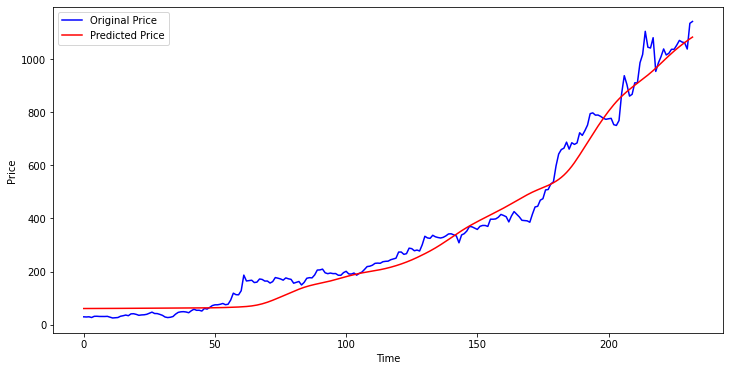

In [129]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label = 'Original Price')
plt.plot(y_pred, 'r', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

**Yahoo finance github link and syntax:**
* https://github.com/ranaroussi/yfinance

```
import yfinance as yf

adanient = yf.Ticker("ADANIENT.NS")

# get all stock info (slow)
adanient.info
# fast access to subset of stock info (opportunistic)
# msft.fast_info

# get historical market data
# hist = msft.history(period="1mo")

# show meta information about the history (requires history() to be called first)
# msft.history_metadata

# show actions (dividends, splits, capital gains)
# msft.actions
# msft.dividends
# msft.splits
# msft.capital_gains  # only for mutual funds & etfs

# show share count
# - yearly summary:
# msft.shares
# - accurate time-series count:
# msft.get_shares_full(start="2022-01-01", end=None)

# show financials:
# - income statement
# msft.income_stmt
# msft.quarterly_income_stmt
# - balance sheet
# msft.balance_sheet
# msft.quarterly_balance_sheet
```